In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.feather as feather


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Loading the data file

In [3]:
#Opening the feather file


# Load the Feather file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/mds_data_lst_5_years.csv')


In [4]:
# view the dataset

df

,name,longitude,latitude,simDoc,soilCapacity,initialSW,NFert,sowDate,cultivar,pldensity,...,RainSum,RainBeforeFlowering,RainAroundFlowering,RainAfterFlowering,PTQSum,RunOffSum,MaxTAVG,MinTAVG,MeanTAVG,CGRAroundFlowering
0,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,mid,mid,...,14.6,13.4,0.3,0.9,0.881,0.000,25.598,10.907,18.253,37.809
1,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,mid,mid,...,248.7,56.6,62.2,129.9,0.713,39.655,26.014,12.831,19.423,136.407
2,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,mid,mid,...,35.2,17.3,10.8,7.1,0.772,0.000,26.769,11.453,19.111,27.708
3,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,mid,mid,...,34.1,12.8,21.2,0.1,0.849,0.000,26.465,10.480,18.473,54.073
4,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,mid,mid,...,86.6,63.5,22.5,0.6,0.755,0.359,24.899,11.688,18.294,112.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83195,griffith,146.043836,-34.279924,146_-34.3,d,100,300,15-sep,mid,mid,...,120.6,40.3,32.3,48.0,1.292,0.000,29.979,13.934,21.956,62.874
83196,griffith,146.043836,-34.279924,146_-34.3,d,100,300,15-sep,mid,mid,...,96.9,45.9,7.5,43.5,1.252,0.000,29.941,14.029,21.985,82.524
83197,griffith,146.043836,-34.279924,146_-34.3,d,100,300,15-sep,mid,mid,...,182.1,131.6,9.7,40.8,1.257,0.680,27.012,11.871,19.441,163.625
83198,griffith,146.043836,-34.279924,146_-34.3,d,100,300,15-sep,mid,mid,...,193.4,76.2,90.8,26.4,1.212,0.000,29.963,13.786,21.875,125.752


# Column description

1. **name**: Represents the name or identifier of the location where the data was collected.
2. **longitude**: The longitudinal coordinate of the location where the data was collected, expressed in decimal degrees. It indicates the east-west position relative to the Prime Meridian.
3. **latitude**: The latitudinal coordinate of the location where the data was collected, expressed in decimal degrees. It indicates the north-south position relative to the equator.
4. **simDoc**: This column might indicate a simulated document or simulation identifier associated with the data.
5. **soilCapacity**: Represents the soil capacity or water-holding capacity of the soil at the location.
6. **initialSW**: Initial soil water content or soil moisture level at the beginning of the simulation period.
7. **NFert**: Amount of nitrogen fertilizer applied to the soil.
8. **sowDate**: The date on which the crop seeds were sown or planted.
9. **cultivar**: The specific cultivar or variety of the crop being cultivated.
10. **pldensity**: Plant density, indicating the number of plants per unit area.
11. **SSC_start**: Initial soil surface condition or soil surface cover at the start of the simulation period.
12. **SSC_slowstart**: Soil surface condition or cover at the slow start of the simulation period.
13. **year**: The year in which the data was collected or the simulation was conducted.
14. **yield**: The crop yield or amount of harvested produce obtained from the location.
15. **pawc**: Plant-available water capacity, representing the amount of water that the soil can supply to the plant roots.
16. **EpSum**: Total evapotranspiration during the simulation period.
17. **EpBeforeFlowering**: Evapotranspiration before flowering.
18. **EpAroundFlowering**: Evapotranspiration around flowering.
19. **EpAfterFlowering**: Evapotranspiration after flowering.
20. **EsSum**: Total soil evaporation during the simulation period.
21. **EsBeforeFlowering**: Soil evaporation before flowering.
22. **EsAroundFlowering**: Soil evaporation around flowering.
23. **EsAfterFlowering**: Soil evaporation after flowering.
24. **RadnSum**: Total solar radiation received during the simulation period.
25. **RadnBeforeFlowering**: Solar radiation received before flowering.
26. **RadnAroundFlowering**: Solar radiation received around flowering.
27. **RadnAfterFlowering**: Solar radiation received after flowering.
28. **RainSum**: Total rainfall during the simulation period.
29. **RainBeforeFlowering**: Rainfall before flowering.
30. **RainAroundFlowering**: Rainfall around flowering.
31. **RainAfterFlowering**: Rainfall after flowering.
32. **PTQSum**: Photothermal quotient sum.
33. **RunOffSum**: Total runoff during the simulation period.
34. **MaxTAVG**: Average maximum temperature during the simulation period.
35. **MinTAVG**: Average minimum temperature during the simulation period.
36. **MeanTAVG**: Average temperature during the simulation period.
37. **CGRAroundFlowering**: Cumulative growing degree days around flowering.


## Exploratory Data Analysis(EDA)

In [ ]:
#EDA

# Get summary statistics of numerical columns
print(df.describe())

          longitude      latitude         NFert     SSC_start  SSC_slowstart  \
count  83200.000000  83200.000000  83200.000000  83200.000000        83200.0   
mean     148.627157    -29.855137    112.500000   1250.000000            0.0   
std        2.205489      3.749887    113.881104    559.020354            0.0   
min      143.888300    -35.709033      0.000000    500.000000            0.0   
25%      148.165108    -32.218617     37.500000    875.000000            0.0   
50%      148.987509    -30.319520     75.000000   1250.000000            0.0   
75%      149.799006    -27.181791    150.000000   1625.000000            0.0   
max      151.257293    -23.511288    300.000000   2000.000000            0.0   

               year         yield          pawc         EpSum  \
count  83200.000000  83200.000000  83200.000000  83200.000000   
mean    2016.923077   1314.297814    114.063317     94.721485   
std        1.384624    926.691595     63.580557     52.373387   
min     2015.000000

In [ ]:
# Check for missing values
print(df.isnull().sum())

#This implies there are no missing values in the dataset

name                   0
longitude              0
latitude               0
simDoc                 0
soilCapacity           0
initialSW              0
NFert                  0
sowDate                0
cultivar               0
pldensity              0
SSC_start              0
SSC_slowstart          0
year                   0
yield                  0
pawc                   0
EpSum                  0
EpBeforeFlowering      0
EpAroundFlowering      0
EpAfterFlowering       0
EsSum                  0
EsBeforeFlowering      0
EsAroundFlowering      0
EsAfterFlowering       0
RadnSum                0
RadnBeforeFlowering    0
RadnAroundFlowering    0
RadnAfterFlowering     0
RainSum                0
RainBeforeFlowering    0
RainAroundFlowering    0
RainAfterFlowering     0
PTQSum                 0
RunOffSum              0
MaxTAVG                0
MinTAVG                0
MeanTAVG               0
CGRAroundFlowering     0
dtype: int64


**The result implies that there are no missing values in the dataset**

In [ ]:

# Get the data types of all columns
column_data_types = df.dtypes

print(column_data_types)

name                    object
longitude              float64
latitude               float64
simDoc                  object
soilCapacity            object
initialSW               object
NFert                    int64
sowDate                 object
cultivar                object
pldensity               object
SSC_start              float64
SSC_slowstart          float64
year                     int64
yield                  float64
pawc                   float64
EpSum                  float64
EpBeforeFlowering      float64
EpAroundFlowering      float64
EpAfterFlowering       float64
EsSum                  float64
EsBeforeFlowering      float64
EsAroundFlowering      float64
EsAfterFlowering       float64
RadnSum                float64
RadnBeforeFlowering    float64
RadnAroundFlowering    float64
RadnAfterFlowering     float64
RainSum                float64
RainBeforeFlowering    float64
RainAroundFlowering    float64
RainAfterFlowering     float64
PTQSum                 float64
RunOffSu

In [ ]:
#Identify how many unique values each and every columns contain

df.nunique()



,0
name,9
longitude,9
latitude,9
simDoc,9
soilCapacity,5
initialSW,4
NFert,4
sowDate,6
cultivar,1
pldensity,1


## Removing unwanted columns that has no variability to provide

**In linear regression, each predictor variable is expected to have some variation that the model can use to discern patterns in how the dependent variable changes. A column with only a single value across all observations doesn't provide any information that could help in predicting the outcome variable, making it redundant for the model.**

**Columns that have only one unique value can be safely dropped from the dataset before modeling. This will simplify your model and potentially improve its performance by focusing only on variables that could influence the outcome.**

In [5]:
# #Removing columns that has uniqueness 1 since it cannot contribute to any variations and therefore cannot contribute to the predictive power of the model

unwanted_columns = ['cultivar', 'pldensity','SSC_slowstart']

# Remove unwanted columns from the dataset
df = df.drop(columns=unwanted_columns)

# Display the first few rows of the cleaned dataset
df.head()


,name,longitude,latitude,simDoc,soilCapacity,initialSW,NFert,sowDate,SSC_start,year,...,RainSum,RainBeforeFlowering,RainAroundFlowering,RainAfterFlowering,PTQSum,RunOffSum,MaxTAVG,MinTAVG,MeanTAVG,CGRAroundFlowering
0,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,500.0,2015,...,14.6,13.4,0.3,0.9,0.881,0.000,25.598,10.907,18.253,37.809
1,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,500.0,2016,...,248.7,56.6,62.2,129.9,0.713,39.655,26.014,12.831,19.423,136.407
2,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,500.0,2017,...,35.2,17.3,10.8,7.1,0.772,0.000,26.769,11.453,19.111,27.708
3,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,500.0,2018,...,34.1,12.8,21.2,0.1,0.849,0.000,26.465,10.480,18.473,54.073
4,emerald,148.165108,-23.511288,148.2_-23.5,base,25top,0,15-apr,500.0,2019,...,86.6,63.5,22.5,0.6,0.755,0.359,24.899,11.688,18.294,112.384


## One-Hot encoding

In [6]:
#One hot encoding

categorical_cols = ['name', 'soilCapacity', 'initialSW', 'sowDate', 'simDoc']

# One-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df = df.astype(int)

df


,longitude,latitude,NFert,SSC_start,year,yield,pawc,EpSum,EpBeforeFlowering,EpAroundFlowering,...,sowDate_15-may,sowDate_15-sep,simDoc_146_-34.3,simDoc_148.2_-23.5,simDoc_148.6_-32.2,simDoc_149.8_-25.6,simDoc_149.8_-30.3,simDoc_149_-29,simDoc_150.9_-31.1,simDoc_151.3_-27.2
0,148,-23,0,500,2015,453,60,47,37,7,...,0,0,0,1,0,0,0,0,0,0
1,148,-23,0,500,2016,1272,60,80,42,25,...,0,0,0,1,0,0,0,0,0,0
2,148,-23,0,500,2017,515,60,50,40,6,...,0,0,0,1,0,0,0,0,0,0
3,148,-23,0,500,2018,653,60,55,41,11,...,0,0,0,1,0,0,0,0,0,0
4,148,-23,0,500,2019,988,60,64,30,20,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83195,146,-34,300,2000,2015,1188,142,121,84,21,...,0,1,1,0,0,0,0,0,0,0
83196,146,-34,300,2000,2016,1102,142,124,92,22,...,0,1,1,0,0,0,0,0,0,0
83197,146,-34,300,2000,2017,2665,142,180,88,48,...,0,1,1,0,0,0,0,0,0,0
83198,146,-34,300,2000,2018,1900,142,165,110,34,...,0,1,1,0,0,0,0,0,0,0


In [7]:
# Get the names of one-hot encoded categorical columns
one_hot_cols = [col for col in df.columns if col.startswith(tuple(categorical_cols))]

# Loop through each one-hot encoded column
for col in one_hot_cols:
    # Print the column name
    print(f"One-hot encoded column: {col}")
    # Print the unique values in the one-hot encoded column
    print(df[col].unique())


One-hot encoded column: name_dubbo
[0 1]
One-hot encoded column: name_emerald
[1 0]
One-hot encoded column: name_griffith
[0 1]
One-hot encoded column: name_kerang
[0 1]
One-hot encoded column: name_mungindi
[0 1]
One-hot encoded column: name_narrabri
[0 1]
One-hot encoded column: name_tamworth
[0 1]
One-hot encoded column: name_taroom
[0 1]
One-hot encoded column: soilCapacity_b
[0 1]
One-hot encoded column: soilCapacity_base
[1 0]
One-hot encoded column: soilCapacity_c
[0 1]
One-hot encoded column: soilCapacity_d
[0 1]
One-hot encoded column: initialSW_25top
[1 0]
One-hot encoded column: initialSW_50top
[0 1]
One-hot encoded column: initialSW_75top
[0 1]
One-hot encoded column: sowDate_15-aug
[0 1]
One-hot encoded column: sowDate_15-jul
[0 1]
One-hot encoded column: sowDate_15-jun
[0 1]
One-hot encoded column: sowDate_15-may
[0 1]
One-hot encoded column: sowDate_15-sep
[0 1]
One-hot encoded column: simDoc_146_-34.3
[0 1]
One-hot encoded column: simDoc_148.2_-23.5
[1 0]
One-hot encode

In [8]:
# Get the data types of all columns
column_data_types = df.dtypes

print(column_data_types)

longitude              int64
latitude               int64
NFert                  int64
SSC_start              int64
year                   int64
yield                  int64
pawc                   int64
EpSum                  int64
EpBeforeFlowering      int64
EpAroundFlowering      int64
EpAfterFlowering       int64
EsSum                  int64
EsBeforeFlowering      int64
EsAroundFlowering      int64
EsAfterFlowering       int64
RadnSum                int64
RadnBeforeFlowering    int64
RadnAroundFlowering    int64
RadnAfterFlowering     int64
RainSum                int64
RainBeforeFlowering    int64
RainAroundFlowering    int64
RainAfterFlowering     int64
PTQSum                 int64
RunOffSum              int64
MaxTAVG                int64
MinTAVG                int64
MeanTAVG               int64
CGRAroundFlowering     int64
name_dubbo             int64
name_emerald           int64
name_griffith          int64
name_kerang            int64
name_mungindi          int64
name_narrabri 

In [ ]:
df

,longitude,latitude,NFert,SSC_start,year,yield,pawc,EpSum,EpBeforeFlowering,EpAroundFlowering,...,sowDate_15-may,sowDate_15-sep,simDoc_146_-34.3,simDoc_148.2_-23.5,simDoc_148.6_-32.2,simDoc_149.8_-25.6,simDoc_149.8_-30.3,simDoc_149_-29,simDoc_150.9_-31.1,simDoc_151.3_-27.2
0,148,-23,0,500,2015,453,60,47,37,7,...,0,0,0,1,0,0,0,0,0,0
1,148,-23,0,500,2016,1272,60,80,42,25,...,0,0,0,1,0,0,0,0,0,0
2,148,-23,0,500,2017,515,60,50,40,6,...,0,0,0,1,0,0,0,0,0,0
3,148,-23,0,500,2018,653,60,55,41,11,...,0,0,0,1,0,0,0,0,0,0
4,148,-23,0,500,2019,988,60,64,30,20,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83195,146,-34,300,2000,2015,1188,142,121,84,21,...,0,1,1,0,0,0,0,0,0,0
83196,146,-34,300,2000,2016,1102,142,124,92,22,...,0,1,1,0,0,0,0,0,0,0
83197,146,-34,300,2000,2017,2665,142,180,88,48,...,0,1,1,0,0,0,0,0,0,0
83198,146,-34,300,2000,2018,1900,142,165,110,34,...,0,1,1,0,0,0,0,0,0,0


In [9]:
#Checking the columns and its size
num_cols = df.select_dtypes(include=np.number).columns

print(len(num_cols))

print(num_cols)

57
Index(['longitude', 'latitude', 'NFert', 'SSC_start', 'year', 'yield', 'pawc',
       'EpSum', 'EpBeforeFlowering', 'EpAroundFlowering', 'EpAfterFlowering',
       'EsSum', 'EsBeforeFlowering', 'EsAroundFlowering', 'EsAfterFlowering',
       'RadnSum', 'RadnBeforeFlowering', 'RadnAroundFlowering',
       'RadnAfterFlowering', 'RainSum', 'RainBeforeFlowering',
       'RainAroundFlowering', 'RainAfterFlowering', 'PTQSum', 'RunOffSum',
       'MaxTAVG', 'MinTAVG', 'MeanTAVG', 'CGRAroundFlowering', 'name_dubbo',
       'name_emerald', 'name_griffith', 'name_kerang', 'name_mungindi',
       'name_narrabri', 'name_tamworth', 'name_taroom', 'soilCapacity_b',
       'soilCapacity_base', 'soilCapacity_c', 'soilCapacity_d',
       'initialSW_25top', 'initialSW_50top', 'initialSW_75top',
       'sowDate_15-aug', 'sowDate_15-jul', 'sowDate_15-jun', 'sowDate_15-may',
       'sowDate_15-sep', 'simDoc_146_-34.3', 'simDoc_148.2_-23.5',
       'simDoc_148.6_-32.2', 'simDoc_149.8_-25.6', 'simDoc_149.

## Standardization and Normalization of data

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Scale the entire dataset
data_scaled_standard = scaler_standard.fit_transform(df)

# Convert the scaled array back into a DataFrame
df_scaled_standard = pd.DataFrame(data_scaled_standard, columns=df.columns)

# Display the scaled dataset using StandardScaler
print("\nScaled dataset (StandardScaler):")
print(df_scaled_standard.head(5))  # Display the first 5 rows

# Initialize the MinMaxScaler
scaler_minmax = MinMaxScaler()

# Normalize the scaled dataset further
data_normalized = scaler_minmax.fit_transform(data_scaled_standard)

# Convert the normalized array back into a DataFrame
data = pd.DataFrame(data_normalized, columns=df.columns)

# Display the normalized dataset using MinMaxScaler
print("\nNormalized dataset (MinMaxScaler):")
print(data.head(5))  # Display the first 5 rows



Scaled dataset (StandardScaler):
   longitude  latitude     NFert  SSC_start      year     yield      pawc  \
0  -0.008767  1.692299 -0.987878  -1.341641 -1.388889 -0.928907 -0.849776   
1  -0.008767  1.692299 -0.987878  -1.341641 -0.666667 -0.045108 -0.849776   
2  -0.008767  1.692299 -0.987878  -1.341641  0.055556 -0.862001 -0.849776   
3  -0.008767  1.692299 -0.987878  -1.341641  0.777778 -0.713083 -0.849776   
4  -0.008767  1.692299 -0.987878  -1.341641  1.500000 -0.351578 -0.849776   

      EpSum  EpBeforeFlowering  EpAroundFlowering  ...  sowDate_15-may  \
0 -0.901686          -0.441418          -0.936839  ...       -0.457496   
1 -0.271599          -0.258225          -0.127869  ...       -0.457496   
2 -0.844405          -0.331502          -0.981782  ...       -0.457496   
3 -0.748938          -0.294863          -0.757068  ...       -0.457496   
4 -0.577096          -0.697890          -0.352583  ...       -0.457496   

   sowDate_15-sep  simDoc_146_-34.3  simDoc_148.2_-23.5  s

In [11]:
data



,longitude,latitude,NFert,SSC_start,year,yield,pawc,EpSum,EpBeforeFlowering,EpAroundFlowering,...,sowDate_15-may,sowDate_15-sep,simDoc_146_-34.3,simDoc_148.2_-23.5,simDoc_148.6_-32.2,simDoc_149.8_-25.6,simDoc_149.8_-30.3,simDoc_149_-29,simDoc_150.9_-31.1,simDoc_151.3_-27.2
0,0.625,1.000000,0.0,0.0,0.00,0.067811,0.150943,0.086854,0.154206,0.050360,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.625,1.000000,0.0,0.0,0.25,0.211319,0.150943,0.164319,0.177570,0.179856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.625,1.000000,0.0,0.0,0.50,0.078675,0.150943,0.093897,0.168224,0.043165,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.625,1.000000,0.0,0.0,0.75,0.102856,0.150943,0.105634,0.172897,0.079137,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625,1.000000,0.0,0.0,1.00,0.161556,0.150943,0.126761,0.121495,0.143885,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83195,0.375,0.083333,1.0,1.0,0.00,0.196601,0.460377,0.260563,0.373832,0.151079,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83196,0.375,0.083333,1.0,1.0,0.25,0.181531,0.460377,0.267606,0.411215,0.158273,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83197,0.375,0.083333,1.0,1.0,0.50,0.455406,0.460377,0.399061,0.392523,0.345324,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83198,0.375,0.083333,1.0,1.0,0.75,0.321360,0.460377,0.363850,0.495327,0.244604,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Removing the outliers

In [12]:
import pandas as pd

def remove_outliers_from_columns(df, cols, factor=1.5):

    cleaned_df = df.copy()

    for col in cols:
        q1 = cleaned_df[col].quantile(0.25)  # Calculate the first quartile (Q1)
        q3 = cleaned_df[col].quantile(0.75)  # Calculate the third quartile (Q3)
        iqr = q3 - q1  # Calculate the Interquartile Range (IQR)

        # Calculate the lower and upper bounds for outlier detection
        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)

        # Remove outliers from the column
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

    return cleaned_df

# Example usage

# Remove outliers from the specified columns
cols_to_clean = ['yield', 'pawc', 'EpSum', 'EpBeforeFlowering', 'EpAroundFlowering', 'EpAfterFlowering', 'EsSum', 'EsBeforeFlowering', 'EsAroundFlowering', 'EsAfterFlowering', 'RadnSum', 'RadnAfterFlowering', 'RainSum', 'RainBeforeFlowering', 'RainAroundFlowering', 'RainAfterFlowering', 'PTQSum', 'CGRAroundFlowering']
data = remove_outliers_from_columns(df, cols_to_clean)


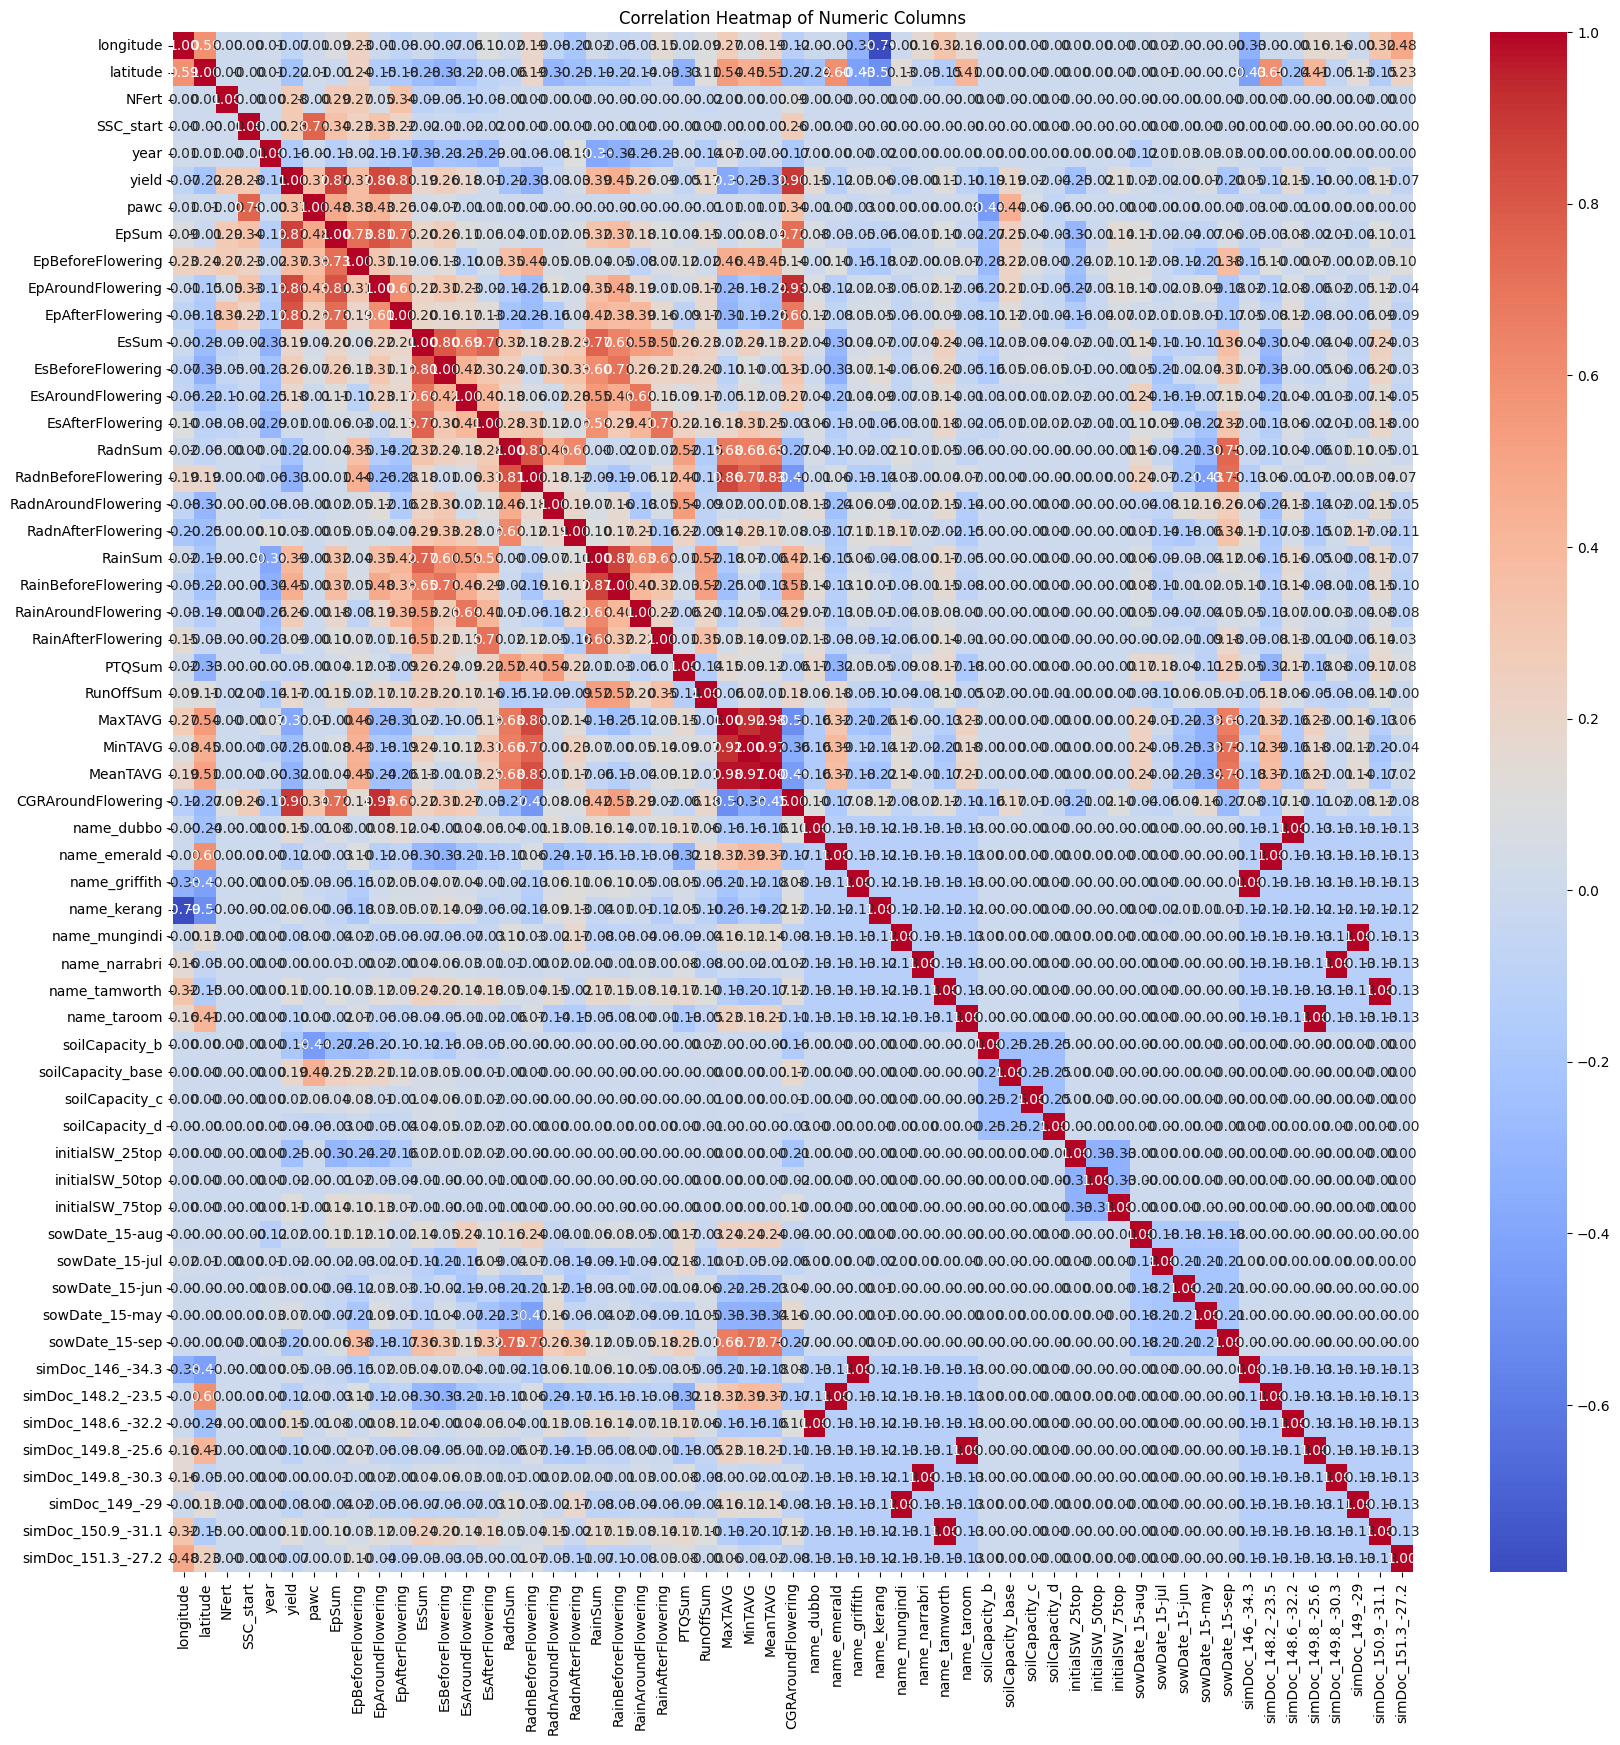

In [ ]:
#correlation matrix for the cleaned dataset


# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression


X = data.drop('yield', axis=1)  # Features
y = data['yield']  # Target variable

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Subsample the data for quicker processing if needed
X_train = X_train.sample(frac=0.9, random_state=42)
y_train = y_train.loc[X_train.index]

# Setting up the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)




In [ ]:
# Print the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (59904, 56)
Shape of X_test: (16640, 56)
Shape of y_train: (59904,)
Shape of y_test: (16640,)


<ipython-input-22-186899457d70>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette='cool')


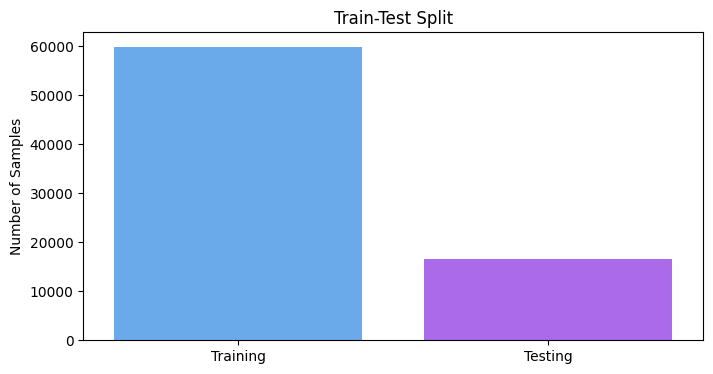

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sizes
train_size = len(X_train)
test_size = len(X_test)
sizes = [train_size, test_size]
labels = ['Training', 'Testing']

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=labels, y=sizes, palette='cool')
plt.title('Train-Test Split')
plt.ylabel('Number of Samples')
plt.show()


 ## Ridge regression with 5 fold cv and using the best hyperparameter

In [ ]:
# Example of hyperparameter tuning for a Ridge regression (you can change the model and parameters)
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

model = Ridge()
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

# Setting up GridSearchCV to combine model training with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

# Optionally, evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score: {:.4f}".format(test_score))

# #coeffients
# #intercepts

Best parameters: {'alpha': 0.0001}
Best cross-validation score: -0.00146
Test score: 0.9454


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize Ridge regression model
ridge_model = Ridge(alpha=10)  # You can adjust the alpha parameter for regularization strength

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  # RMSE
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)  # MAE

print("Ridge Regression:")
print(f'MSE on test set: {mse_ridge}')
print(f'R^2 on test set: {r2_ridge}')
print(f'RMSE on test set: {rmse_ridge}')
print(f'MAE on test set: {mae_ridge}')

Ridge Regression:
MSE on test set: 0.0013991764254904324
R^2 on test set: 0.9451450835660581
RMSE on test set: 0.03740556677141028
MAE on test set: 0.026848910051358095


## Lasso regression using 5 fold cv and the best hyperparameter

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model = Lasso()
param_grid = {'alpha': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

# Setting up GridSearchCV to combine model training with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.5f}".format(grid_search.best_score_))

# Optionally, evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test score: {:.4f}".format(test_score))


Best parameters: {'alpha': 0.0001}
Best cross-validation score: -0.00149
Test score: 0.9442


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso regression model with alpha = 0.001
lasso = Lasso(alpha=0.0001)

# Fit the model to the scaled training data
lasso.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluation metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)  # RMSE
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)
print("R^2 Score:", r2_lasso)



Lasso Regression Metrics:
Mean Squared Error (MSE): 0.0013971193042282418
Root Mean Squared Error (RMSE): 0.037378059128695296
Mean Absolute Error (MAE): 0.026744141061925963
R^2 Score: 0.9452257333060595


## Multiple linear regesssion

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Multiple Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

negMSE = cross_val_score(lr,X,y, scoring='neg_mean_squared_error',cv=5)
mean_negMSE = np.mean(negMSE)
print("Negative Mean squared Error: ",mean_negMSE)

Multiple Linear Regression Metrics:
Mean Squared Error (MSE): 0.0013932893280526777
Mean Absolute Error (MAE): 0.026780181913739244
R^2 Score: 0.9453758880822744
Root Mean Squared Error (RMSE): 0.03732679102270483
Negative Mean squared Error:  -0.0015396016037399498


## Random regression

In [ ]:

from sklearn.ensemble import RandomForestRegressor
n=10
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=30, random_state=42)

# Fit the model to your data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top n features
print(feature_importance_df.head(n))




                Feature  Importance
27   CGRAroundFlowering    0.685490
9      EpAfterFlowering    0.204887
6                 EpSum    0.062110
2                 NFert    0.016769
7     EpBeforeFlowering    0.006339
15  RadnBeforeFlowering    0.003218
24              MaxTAVG    0.003118
8     EpAroundFlowering    0.003110
16  RadnAroundFlowering    0.001124
11    EsBeforeFlowering    0.000966


<ipython-input-29-927e025a5970>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'][:n],


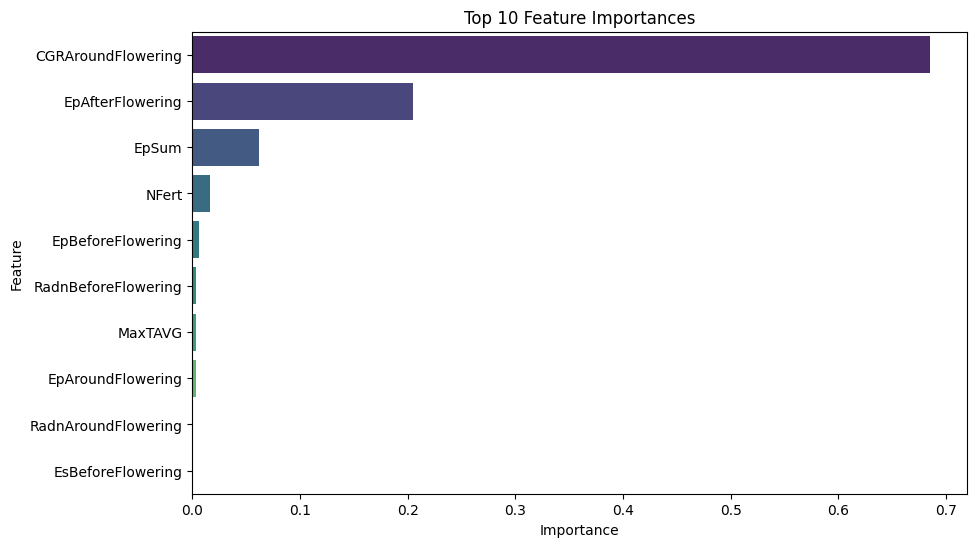

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Importance' is sorted in descending order if not already
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Number of top features to plot
n = 10 
# Create the plot with viridis color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'][:n],
            y=feature_importance_df['Feature'][:n],
            palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(n))
# No need to invert y-axis, as the data is already sorted in descending order
plt.show()


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

n=10
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE
selector =RFE(estimator=rf, n_features_to_select=n)

# Fit RFE
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]

# Print selected features
print("Selected Features:", selected_features)


# Create a new feature matrix with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Selected Features: Index(['NFert', 'EpSum', 'EpBeforeFlowering', 'EpAroundFlowering',
       'EpAfterFlowering', 'RadnBeforeFlowering', 'RainBeforeFlowering',
       'RainAfterFlowering', 'MaxTAVG', 'CGRAroundFlowering'],
      dtype='object')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [100],
    'max_depth': [30],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)

# Fit the model to the entire training data
best_rf.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = best_rf.predict(X_test_selected)

# Evaluate the model using cross-validation and performance metrics
mse_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
mse_mean = -mse_scores.mean()  # Take the negative mean to get the MSE
r2_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=5, scoring='r2')

# Calculate other performance metrics
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Cross-Validation Mean Squared Error:", mse_mean)
print("Cross-Validation R^2 Score:", r2_scores.mean())
print("Test Mean Squared Error:", mse_test)
print("Test R^2 Score:", r2_test)


Cross-Validation Mean Squared Error: 6.955692740660044e-05
Cross-Validation R^2 Score: 0.9974034910935957
Test Mean Squared Error: 5.550880956195997e-05
Test R^2 Score: 0.9978237690012526



Feature Importance (RFE-selected features):
CGRAroundFlowering: 0.6859
EpAfterFlowering: 0.2089
EpSum: 0.0587
NFert: 0.0170
EpBeforeFlowering: 0.0079
EpAroundFlowering: 0.0062
MaxTAVG: 0.0049
RadnBeforeFlowering: 0.0045
RainBeforeFlowering: 0.0032
RainAfterFlowering: 0.0027


<ipython-input-33-1a275d75c5f8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


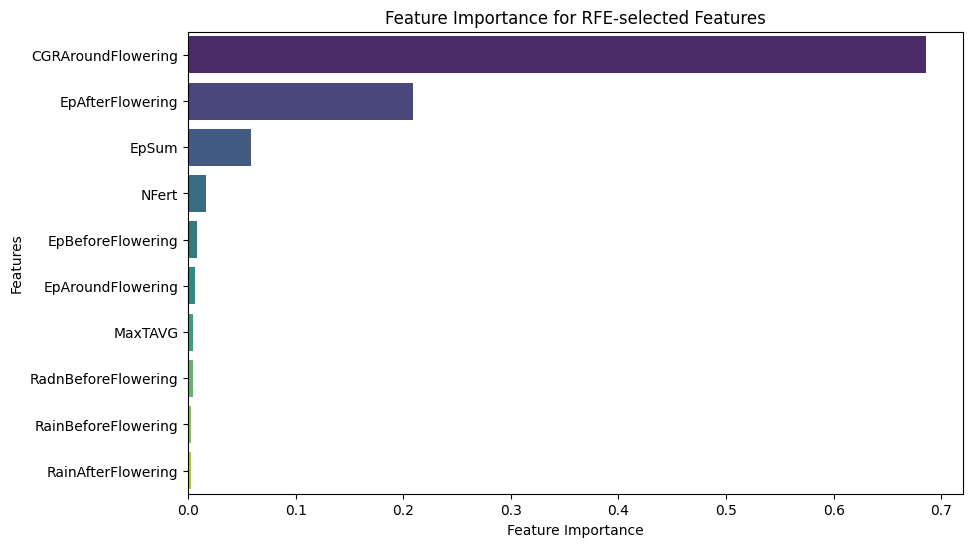

In [ ]:
# Calculate feature importance for the selected features
feature_importances = best_rf.feature_importances_
feature_importance_dict = dict(zip(selected_features, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importance (RFE-selected features):")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


# Extract feature names and importance values
features, importances = zip(*sorted_feature_importance)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for RFE-selected Features')
plt.show()